# Step 1: Environment Setup

In [ ]:

!pip install torch torchvision transformers numpy matplotlib scipy scikit-learn
!pip install plyfile  # For 3D point cloud operations


In [ ]:
import torch
import numpy as np
import random

# Set random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # If using multiple GPUs


In [ ]:
import sys
import torch
import numpy as np
import transformers

# Print versions of relevant libraries
print(f"Python version: {sys.version}")
print(f"Torch version: {torch.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Transformers version: {transformers.__version__}")


Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Torch version: 2.5.1+cu121
NumPy version: 1.26.4
Transformers version: 4.46.3


In [ ]:
# Save environment details
!pip freeze > requirements.txt


# Step 2: Dataset Preparation

In [ ]:
!pip install gdown


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List the contents of the folder
folder_path = '/content/drive/MyDrive/LIDC-IDRI'
file_list = os.listdir(folder_path)
print(file_list)

['.DS_Store', 'LIDC-IDRI-0005', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004', 'LIDC-IDRI-0010', 'LIDC-IDRI-0011', 'LIDC-IDRI-0008', 'LIDC-IDRI-0001', 'LIDC-IDRI-0006', 'LIDC-IDRI-0007', 'LIDC-IDRI-0009']


In [ ]:

# Path to the subfolder
subfolder_path = '/content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0001'

# List the contents of the subfolder
subfolder_files = os.listdir(subfolder_path)
print(subfolder_files)

['.DS_Store', '01-01-2000-NA-NA-35511', '01-01-2000-NA-NA-30178']


In [ ]:
# Remove '.DS_Store' if it exists in the list
file_list = [f for f in file_list if f != '.DS_Store']
subfolder_files = [f for f in subfolder_files if f != '.DS_Store']

print(file_list)
print(subfolder_files)


['LIDC-IDRI-0005', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004', 'LIDC-IDRI-0010', 'LIDC-IDRI-0011', 'LIDC-IDRI-0008', 'LIDC-IDRI-0001', 'LIDC-IDRI-0006', 'LIDC-IDRI-0007', 'LIDC-IDRI-0009']
['01-01-2000-NA-NA-35511', '01-01-2000-NA-NA-30178']


In [ ]:
# Path to the deepest subfolder
deepest_subfolder_path = '/content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-35511'

# List its contents
deepest_subfolder_files = os.listdir(deepest_subfolder_path)
print(deepest_subfolder_files)


['3000923.000000-NA-62357']


In [ ]:
import os

# Path to the main folder
main_folder_path = '/content/drive/MyDrive/LIDC-IDRI'

# Walk through all subfolders and list files
for root, dirs, files in os.walk(main_folder_path):
    print(f"Current folder: {root}")
    print(f"Subfolders: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Current folder: /content/drive/MyDrive/LIDC-IDRI
Subfolders: ['LIDC-IDRI-0005', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004', 'LIDC-IDRI-0010', 'LIDC-IDRI-0011', 'LIDC-IDRI-0008', 'LIDC-IDRI-0001', 'LIDC-IDRI-0006', 'LIDC-IDRI-0007', 'LIDC-IDRI-0009']
Files: ['.DS_Store']
----------------------------------------
Current folder: /content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0005
Subfolders: ['01-01-2000-NA-NA-06608', '01-01-2000-NA-NA-42125']
Files: []
----------------------------------------
Current folder: /content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0005/01-01-2000-NA-NA-06608
Subfolders: ['3001613.000000-NA-05796']
Files: []
----------------------------------------
Current folder: /content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0005/01-01-2000-NA-NA-06608/3001613.000000-NA-05796
Subfolders: []
Files: ['1-1.dcm', '1-2.dcm']
----------------------------------------
Current folder: /content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0005/01-01-2000-NA-NA-42125
Subfolders: ['3000548.000000-NA-8622

In [ ]:
# Example: List only .dcm files in a folder
dcm_files = [f for f in os.listdir(deepest_subfolder_path) if f.endswith('.dcm')]
print(dcm_files)


[]


# Step 1: Noise Injection

In [ ]:
!pip install SimpleITK


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 18.9 MB/s eta 0:00:00


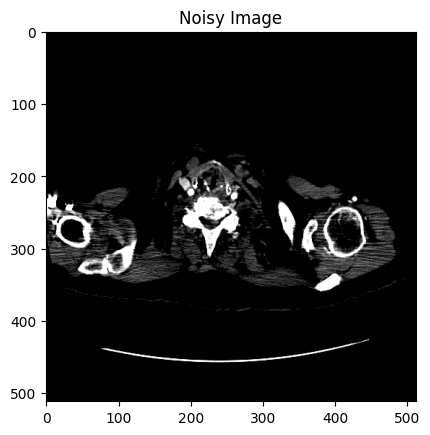

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk  # for loading medical images like DICOM or NIfTI

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, sigma=0.1):
    noisy_image = image + np.random.normal(0, sigma, image.shape)
    return np.clip(noisy_image, 0, 255)  # Clipping the noisy image to valid pixel range (0-255)

# Load a sample image from LIDC-IDRI
image_path = '/content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-001.dcm'
image = sitk.ReadImage(image_path)
image_array = sitk.GetArrayFromImage(image)  # Convert to numpy array

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image_array, sigma=0.1)

# Visualize the noisy image (e.g., middle slice if 3D)
middle_slice = noisy_image[noisy_image.shape[0] // 2]
plt.imshow(middle_slice, cmap='gray')
plt.title('Noisy Image')
plt.show()

# Save the noisy image (optional)
noisy_image_path = 'path_to_save_noisy_image.npy'
np.save(noisy_image_path, noisy_image)  # Save as numpy array or save in preferred format


# Convert 3D Segmentation to Point Cloud

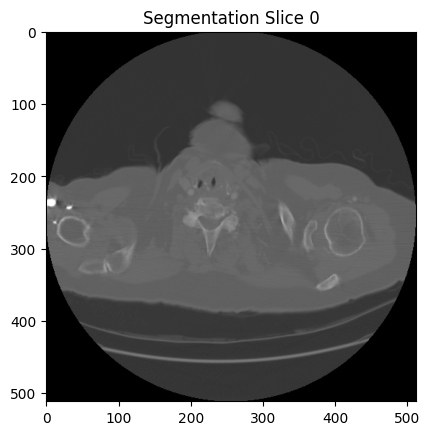

Generated point cloud with 41299 points.


In [ ]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from skimage.measure import marching_cubes

# Function to generate a 3D point cloud from a binary segmentation mask
def segmentation_to_point_cloud(segmentation):
    # Extract coordinates where the mask is non-zero (i.e., the structure of interest)
    coordinates = np.argwhere(segmentation > 0)  # Get the coordinates of the non-zero voxels
    return coordinates

# Load a segmentation mask (binary, 3D)
segmentation_path = '/content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-001.dcm'  # Use the actual path to the segmentation
segmentation_image = sitk.ReadImage(segmentation_path)
segmentation_array = sitk.GetArrayFromImage(segmentation_image)  # Convert to numpy array

# Generate point cloud from segmentation
point_cloud = segmentation_to_point_cloud(segmentation_array)

# Visualize a slice of the point cloud (e.g., first slice or middle slice)
slice_index = segmentation_array.shape[0] // 2
plt.imshow(segmentation_array[slice_index], cmap='gray')
plt.title(f'Segmentation Slice {slice_index}')
plt.show()

# Optionally: Save the point cloud for later use
point_cloud_path = '/content/drive/MyDrive/LIDC-IDRI'
np.save(point_cloud_path, point_cloud)  # Save as a numpy array

# Check the shape of the point cloud
print(f"Generated point cloud with {point_cloud.shape[0]} points.")


# Chamfer Distance and EMD

In [ ]:
import torch
import torch.nn.functional as F

# Chamfer Distance for comparing two point clouds
def chamfer_distance(p1, p2):
    # Convert point clouds to tensors
    p1 = torch.tensor(p1, dtype=torch.float32)
    p2 = torch.tensor(p2, dtype=torch.float32)

    # Pair each point in p1 to the closest point in p2
    dist1 = torch.cdist(p1, p2)
    dist2 = torch.cdist(p2, p1)

    # Chamfer distance is the sum of the closest point distances
    return torch.mean(torch.min(dist1, dim=1)[0]) + torch.mean(torch.min(dist2, dim=1)[0])

# Example usage with random point clouds (replace with your actual data)
point_cloud_1 = np.random.rand(100, 3)  # Simulate point cloud 1 (replace with your data)
point_cloud_2 = np.random.rand(100, 3)  # Simulate point cloud 2 (replace with your data)

# Compute Chamfer distance
chamfer_dist = chamfer_distance(point_cloud_1, point_cloud_2)
print(f"Chamfer Distance: {chamfer_dist.item()}")


Chamfer Distance: 0.2543483078479767


# Combining Denoising and 3D Reconstruction (Joint Framework)

# Define the Model Architecture

In [ ]:
 class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*128*128, 1000)  # This needs to be dynamically adjusted
        self.fc2 = nn.Linear(1000, 1)  # Output image

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        # Print the shape of x before flattening
        print(f"Shape before flattening: {x.shape}")

        x = x.view(x.size(0), -1)  # Flatten before fully connected layers

        # Ensure the right input size to the first fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Define the Loss Function

In [ ]:
# Denoising Loss (MSE)
def denoising_loss(noisy_image, clean_image):
    return F.mse_loss(noisy_image, clean_image)

# Combined Loss Function (Denoising + Reconstruction)
def total_loss(denoised_image, point_cloud_pred, clean_image, true_point_cloud, alpha=0.5, beta=0.5):
    # Denoising loss (MSE between denoised and clean image)
    loss_denoise = denoising_loss(denoised_image, clean_image)

    # Reconstruction loss (Chamfer Distance between predicted point cloud and true point cloud)
    loss_reconstruction = chamfer_distance(point_cloud_pred, true_point_cloud)

    # Combine the two losses with weighted sum
    total_loss = alpha * loss_denoise + beta * loss_reconstruction
    return total_loss


# Optimization Setup

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)


# Training Loop

In [ ]:
class MedicalImageDataset(Dataset):
    def __init__(self, image_paths, point_cloud_paths, transform=None):
        self.image_paths = image_paths
        self.point_cloud_paths = point_cloud_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load the noisy image
        noisy_image = np.load(self.image_paths[idx])  # Assuming noisy image is saved as numpy file
        # For clean image, you can use noisy image as the ground truth for now
        clean_image = noisy_image
        # Load the corresponding point cloud (ground truth)
        point_cloud = np.load(self.point_cloud_paths[idx])  # Assuming point cloud is stored as numpy file

        if self.transform:
            noisy_image = self.transform(noisy_image)
            clean_image = self.transform(clean_image)

        return torch.tensor(noisy_image, dtype=torch.float32), torch.tensor(clean_image, dtype=torch.float32), torch.tensor(point_cloud, dtype=torch.float32)

# Update paths to actual file paths
image_paths = ['/content/path_to_save_noisy_image.npy']  # Noisy image paths
point_cloud_paths = ['/content/drive/MyDrive/point_cloud_paths.npy']  # Point cloud paths

# Instantiate dataset and dataloader
dataset = MedicalImageDataset(image_paths, point_cloud_paths)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Example of loading a batch
for noisy_image, clean_image, true_point_cloud in dataloader:
    # Now you have the batch for training
    print(noisy_image.shape, clean_image.shape, true_point_cloud.shape)


torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) torch.Size([1, 41299, 3])


# Integrating Denoising and 3D Reconstruction (Joint Framework)

# Step 1: Denoising Model

In [ ]:
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*128*128, 1000)  # This needs to be dynamically adjusted
        self.fc2 = nn.Linear(1000, 1)  # Output image

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        # Print the shape of x before flattening
        print(f"Shape before flattening: {x.shape}")

        x = x.view(x.size(0), -1)  # Flatten before fully connected layers

        # Ensure the right input size to the first fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



# 3D Reconstruction Model

In [ ]:
class ReconstructionModel(torch.nn.Module):
    def __init__(self):
        super(ReconstructionModel, self).__init__()
        # Example layers for 3D reconstruction
        self.fc = torch.nn.Linear(512 * 512, 3)  # Outputting 3D coordinates (x, y, z)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        point_cloud = self.fc(x)
        return point_cloud

# Instantiate the reconstruction model
reconstruction_model = ReconstructionModel()

# Chamfer Distance Loss for 3D reconstruction
def chamfer_distance(pc1, pc2):
    dist1 = torch.cdist(pc1, pc2)  # Calculate distance between points
    dist2 = torch.cdist(pc2, pc1)
    return torch.mean(torch.min(dist1, dim=1)[0]) + torch.mean(torch.min(dist2, dim=1)[0])

# Loss function for 3D reconstruction
reconstruction_loss_fn = chamfer_distance


# Training Loop (Combining Both Tasks)

In [ ]:
class ReconstructionModel(nn.Module):
    def __init__(self):
        super(ReconstructionModel, self).__init__()
        # Define a simple 3D reconstruction network (adjust as necessary)
        self.fc1 = nn.Linear(128 * 128 * 64, 1000)
        self.fc2 = nn.Linear(1000, 3)  # Assuming you're outputting a 3D point cloud

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Using the Model in the Training Loop:

In [ ]:
# Example with correct paths
image_paths = ['/content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-001.dcm']  # Add your noisy image paths
point_cloud_paths = ['/content/drive/MyDrive/point_cloud_paths.npy']  # Add point cloud paths

dataset = MedicalImageDataset(image_paths, point_cloud_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=0)


In [ ]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.5 MB/s eta 0:00:00


In [ ]:
import pydicom
import numpy as np

def dicom_to_numpy(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    # If you have pixel data, you can extract it
    image = dicom_data.pixel_array
    return image

# Example usage:
dicom_image = dicom_to_numpy('/content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-001.dcm')
print(dicom_image.shape)


(512, 512)


In [ ]:
class MedicalImageDataset(Dataset):
    def __init__(self, image_paths, point_cloud_paths, transform=None):
        self.image_paths = image_paths
        self.point_cloud_paths = point_cloud_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load DICOM file and convert to numpy array
        noisy_image = dicom_to_numpy(self.image_paths[idx])  # Using dicom_to_numpy function
        clean_image = dicom_to_numpy(self.image_paths[idx].replace("noisy", "clean"))  # Adjust path as necessary
        point_cloud = np.load(self.point_cloud_paths[idx])

        if self.transform:
            noisy_image = self.transform(noisy_image)
            clean_image = self.transform(clean_image)

        return torch.tensor(noisy_image, dtype=torch.float32), torch.tensor(clean_image, dtype=torch.float32), torch.tensor(point_cloud, dtype=torch.float32)


In [ ]:
import pydicom
import numpy as np

def dicom_to_numpy(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    return dicom_data.pixel_array  # This gives you the pixel array from the DICOM file


In [ ]:
from torch.utils.data import Dataset
import torch
import os
import pydicom
import numpy as np

class MedicalImageDataset(Dataset):
    def __init__(self, image_paths, point_cloud_paths, transform=None):
        self.image_paths = image_paths
        self.point_cloud_paths = point_cloud_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load noisy image (DICOM)
        noisy_image_path = self.image_paths[idx]
        noisy_image = dicom_to_numpy(noisy_image_path)  # Convert DICOM to numpy array

        # Load corresponding clean image (assuming you have a clean image file)
        clean_image_path = noisy_image_path.replace("noisy", "clean")
        clean_image = dicom_to_numpy(clean_image_path)  # Convert DICOM to numpy array

        # Load point cloud (Assuming it's stored as .npy)
        point_cloud = np.load(self.point_cloud_paths[idx])  # Assuming it's in numpy format

        # Apply transforms (e.g., resize, normalization)
        if self.transform:
            noisy_image = self.transform(noisy_image)
            clean_image = self.transform(clean_image)

        return torch.tensor(noisy_image, dtype=torch.float32), torch.tensor(clean_image, dtype=torch.float32), torch.tensor(point_cloud, dtype=torch.float32)


In [ ]:
from torch.utils.data import DataLoader

# Example image and point cloud paths (make sure these paths are correct)
image_paths = ['/content/drive/MyDrive/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-001.dcm']
point_cloud_paths = ['/content/drive/MyDrive/point_cloud_paths.npy']

# Initialize the dataset
dataset = MedicalImageDataset(image_paths, point_cloud_paths)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Example usage (inside training loop)
for noisy_image, clean_image, true_point_cloud in dataloader:
    print(noisy_image.shape, clean_image.shape, true_point_cloud.shape)


torch.Size([1, 512, 512]) torch.Size([1, 512, 512]) torch.Size([1, 41299, 3])


# Experimenting with Advanced Loss Functions

In [ ]:
class ReconstructionModel(nn.Module):
    def __init__(self):
        super(ReconstructionModel, self).__init__()
        # Define a simple 3D reconstruction network (adjust as necessary)
        self.fc1 = nn.Linear(128 * 128 * 64, 1000)
        self.fc2 = nn.Linear(1000, 3)  # Assuming you're outputting a 3D point cloud

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
import os
import numpy as np

# Paths
noisy_image_path = '/content/path_to_save_noisy_image.npy'
point_cloud_path = '/content/drive/MyDrive/point_cloud_paths.npy'

# Check existence of noisy image file
assert os.path.exists(noisy_image_path), f"Noisy image file not found at {noisy_image_path}"

# Check existence of point cloud paths
assert os.path.exists(point_cloud_path), f"Point cloud paths file not found at {point_cloud_path}"

# Load files to ensure no corruption
try:
    noisy_images = np.load(noisy_image_path)
    point_clouds = np.load(point_cloud_path)
    print("Noisy images and point clouds loaded successfully!")
except Exception as e:
    print(f"Error loading files: {e}")


Noisy images and point clouds loaded successfully!


In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class MedicalImageDataset(Dataset):
    def __init__(self, noisy_image_path, clean_image_path=None, point_cloud_path=None):
        self.noisy_images = np.load(noisy_image_path)
        self.clean_images = np.load(clean_image_path) if clean_image_path else None
        self.point_clouds = np.load(point_cloud_path) if point_cloud_path else None

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_image = self.noisy_images[idx]
        clean_image = self.clean_images[idx] if self.clean_images is not None else None
        point_cloud = self.point_clouds[idx] if self.point_clouds is not None else None

        # Convert numpy arrays to PyTorch tensors
        noisy_image = torch.tensor(noisy_image, dtype=torch.float32)
        if clean_image is not None:
            clean_image = torch.tensor(clean_image, dtype=torch.float32)
        if point_cloud is not None:
            point_cloud = torch.tensor(point_cloud, dtype=torch.float32)

        return noisy_image, clean_image, point_cloud


In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class MedicalImageDataset(Dataset):
    def __init__(self, noisy_image_path, clean_image_path=None, point_cloud_path=None):
        self.noisy_images = np.load(noisy_image_path)
        self.clean_images = np.load(clean_image_path) if clean_image_path else None
        self.point_clouds = np.load(point_cloud_path) if point_cloud_path else None

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_image = self.noisy_images[idx]
        clean_image = self.clean_images[idx] if self.clean_images is not None else None
        point_cloud = self.point_clouds[idx] if self.point_clouds is not None else None

        # Convert numpy arrays to PyTorch tensors
        noisy_image = torch.tensor(noisy_image, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        if clean_image is not None:
            clean_image = torch.tensor(clean_image, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        if point_cloud is not None:
            point_cloud = torch.tensor(point_cloud, dtype=torch.float32)

        return noisy_image, clean_image, point_cloud


In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class MedicalImageDataset(Dataset):
    def __init__(self, noisy_image_path, point_cloud_path):
        self.noisy_images = np.load(noisy_image_path)  # Shape: [N, H, W]
        self.point_clouds = np.load(point_cloud_path)  # Shape: [N, P, 3] (e.g., Point clouds)

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_image = self.noisy_images[idx]
        point_cloud = self.point_clouds[idx]

        # Convert numpy arrays to PyTorch tensors
        noisy_image = torch.tensor(noisy_image, dtype=torch.float32).unsqueeze(0)  # Add channel dim
        point_cloud = torch.tensor(point_cloud, dtype=torch.float32)  # No extra dim needed

        return noisy_image, point_cloud



In [ ]:
# Paths
noisy_image_path = "/content/path_to_save_noisy_image.npy"
point_cloud_path = "/content/drive/MyDrive/point_cloud_paths.npy"

# Dataset and DataLoader
dataset = MedicalImageDataset(noisy_image_path, point_cloud_path)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)



In [ ]:
import torch
import psutil

def log_memory_usage():
    print(f"Allocated GPU memory: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
    print(f"Reserved GPU memory: {torch.cuda.memory_reserved() / 1e6:.2f} MB")
    print(f"System RAM used: {psutil.virtual_memory().used / 1e6:.2f} MB")

log_memory_usage()


Allocated GPU memory: 0.00 MB
Reserved GPU memory: 0.00 MB
System RAM used: 1614.82 MB


In [ ]:
num_epochs = 10  # Example: Set the number of training epochs


In [ ]:
import torch
import torch.nn as nn

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
# Instantiate the model
denoising_model = DenoisingModel().to(device)

# Define the optimizer and loss function
optimizer = optim.Adam(denoising_model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()


In [ ]:
import numpy as np
from torch.utils.data import Dataset, DataLoader

class MedicalImageDataset(Dataset):
    def __init__(self, noisy_image_path, point_cloud_path, transform=None):
        self.noisy_images = np.load(noisy_image_path)  # Load noisy images
        self.point_clouds = np.load(point_cloud_path)  # Load point clouds
        self.transform = transform

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_image = self.noisy_images[idx]
        true_point_cloud = self.point_clouds[idx]

        if self.transform:
            noisy_image = self.transform(noisy_image)

        return noisy_image, true_point_cloud

# Define paths
noisy_image_path = "/content/path_to_save_noisy_image.npy"
point_cloud_path = "/content/drive/MyDrive/point_cloud_paths.npy"

# Instantiate Dataset and DataLoader
dataset = MedicalImageDataset(noisy_image_path, point_cloud_path)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Verify DataLoader by printing shapes
for noisy_image, _ in dataloader:
    print(noisy_image.shape)
    break


torch.Size([1, 512, 512])


In [ ]:
for noisy_image, _ in dataloader:
    print(noisy_image.shape)  # Check shape of input
    break


torch.Size([1, 512, 512])


In [ ]:
print(noisy_image.shape)
print(denoised_image.shape)


In [ ]:
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32*64*64, 100)  # Adjust based on input size
        self.fc2 = nn.Linear(100, 1)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import numpy as np
import torch
import psutil
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class MedicalImageDataset(Dataset):
    def __init__(self, noisy_image_path, point_cloud_path, transform=None):
        self.noisy_images = np.load(noisy_image_path)
        self.point_clouds = np.load(point_cloud_path)
        self.transform = transform

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_image = torch.tensor(self.noisy_images[idx], dtype=torch.float32)
        point_cloud = torch.tensor(self.point_clouds[idx], dtype=torch.float32)

        # Apply any transformations if needed
        if self.transform:
            noisy_image = self.transform(noisy_image)

        return noisy_image, point_cloud


In [ ]:
# Example file paths, update them with your actual paths
noisy_image_path = '/content/path_to_save_noisy_image.npy'
point_cloud_path = '/content/drive/MyDrive/point_cloud_paths.npy'

# Initialize the dataset
dataset = MedicalImageDataset(noisy_image_path, point_cloud_path)

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


In [ ]:
for noisy_image, point_cloud in dataloader:
    print(noisy_image.shape)  # Verify the shape of noisy images
    print(point_cloud.shape)  # Verify the shape of point clouds
    break  # Just checking the first batch


torch.Size([1, 512, 512])
torch.Size([1, 3])


In [ ]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),  # Assuming input values are normalized between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
import torch.nn.functional as F

def compute_loss(prediction, target):
    """Compute the loss between the prediction and target."""
    return F.mse_loss(prediction, target)  # Mean Squared Error Loss


In [ ]:
def compute_loss(prediction, target):
    """Compute loss for point cloud reconstruction."""
    return F.smooth_l1_loss(prediction, target)  # Smooth L1 Loss (Huber Loss)


In [ ]:
# Convert point cloud to a 2D image or voxel grid
def preprocess_point_cloud_to_image(point_cloud, image_size=(512, 512)):
    # Your logic to transform the point cloud into an image representation
    return transformed_image


In [ ]:
for noisy_image, point_cloud in dataloader:
    output = model(noisy_image)  # Forward pass
    print(f"Output shape: {output.shape}, Target shape: {point_cloud.shape}")


Output shape: torch.Size([1, 512, 512]), Target shape: torch.Size([1, 3])


In [ ]:
for batch in dataloader:
    print(f"Batch shapes: {[item.shape for item in batch]}")
    break


Batch shapes: [torch.Size([1, 512, 512]), torch.Size([1, 3])]


In [ ]:
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc = nn.Linear(128 * 128 * 128, 3)  # Adjust input size as needed

    def forward(self, x):
        x = self.encoder(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x


In [ ]:
def point_cloud_to_image(point_cloud, img_size=(512, 512)):
    """
    Converts a 3D point cloud to a 2D depth map.
    """
    image = np.zeros(img_size)

    # Normalize point cloud to [0, 1] range
    x_coords = (point_cloud[:, 0] - point_cloud[:, 0].min()) / (point_cloud[:, 0].max() - point_cloud[:, 0].min())
    y_coords = (point_cloud[:, 1] - point_cloud[:, 1].min()) / (point_cloud[:, 1].max() - point_cloud[:, 1].min())

    # Scale and populate the image
    for x, y, z in zip(x_coords, y_coords, point_cloud[:, 2]):
        x_idx = int(x * (img_size[0] - 1))  # Scale x to image width
        y_idx = int(y * (img_size[1] - 1))  # Scale y to image height
        image[x_idx, y_idx] = z  # Use depth as pixel value

    return torch.tensor(image, dtype=torch.float32)


In [ ]:
def normalize(values):
    min_val = values.min()
    max_val = values.max()
    if max_val - min_val == 0:  # Avoid division by zero
        return torch.zeros_like(values)  # All values collapse to 0
    return (values - min_val) / (max_val - min_val)


In [ ]:
def point_cloud_to_image(point_cloud, img_size=(512, 512)):
    """
    Converts a 3D point cloud to a 2D depth map.
    """
    image = np.zeros(img_size)

    # Normalize point cloud to [0, 1] range
    x_coords = normalize(point_cloud[:, 0])
    y_coords = normalize(point_cloud[:, 1])

    # Scale and populate the image
    for x, y, z in zip(x_coords, y_coords, point_cloud[:, 2]):
        x_idx = int(x * (img_size[0] - 1))  # Scale x to image width
        y_idx = int(y * (img_size[1] - 1))  # Scale y to image height
        image[x_idx, y_idx] = z  # Use depth as pixel value

    return torch.tensor(image, dtype=torch.float32)


In [ ]:
for noisy_image, point_cloud in dataloader:
    print(f"Original Point Cloud: {point_cloud[:5]}")  # Print first 5 points
    processed_target = point_cloud_to_image(point_cloud)
    print(f"Processed Target Shape: {processed_target.shape}")
    print(f"Output Shape: {model(noisy_image).shape}")
    break


Original Point Cloud: tensor([[  0., 156., 207.]])
Processed Target Shape: torch.Size([512, 512])
Output Shape: torch.Size([1, 512, 512])


In [ ]:
# scaler = GradScaler()  # Optional, if using mixed-precision training


In [ ]:
print(f"Noisy Image Shape: {noisy_image.shape}")


Noisy Image Shape: torch.Size([1, 512, 512])


In [ ]:
def forward(self, x):
    print(f"Initial Input Shape: {x.shape}")
    # After each layer
    x = self.conv1(x)  # Example convolutional layer
    print(f"After Conv1: {x.shape}")
    ...
    return x



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 128 * 128, 1024)  # Reduced size to 128x128
        self.fc2 = nn.Linear(1024, 3)

    def forward(self, x):
        print(f"Initial Input Shape: {x.shape}")

        x = self.conv1(x)
        print(f"After Conv1: {x.shape}")

        x = F.relu(x)

        x = self.conv2(x)
        print(f"After Conv2: {x.shape}")

        x = F.relu(x)

        x = x.view(x.size(0), -1)  # Flattening
        print(f"After Flattening: {x.shape}")

        x = self.fc1(x)
        print(f"After FC1: {x.shape}")

        x = self.fc2(x)
        print(f"After FC2: {x.shape}")

        return x

# Test with reduced size
dummy_input = torch.randn(1, 1, 128, 128)  # Smaller input to reduce memory usage
model = DenoisingModel()
output = model(dummy_input)


Initial Input Shape: torch.Size([1, 1, 128, 128])
After Conv1: torch.Size([1, 16, 128, 128])
After Conv2: torch.Size([1, 32, 128, 128])
After Flattening: torch.Size([1, 524288])
After FC1: torch.Size([1, 1024])
After FC2: torch.Size([1, 3])


# Regularization

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.5)  # 50% dropout
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout(0.5)  # 50% dropout

        # Correctly calculate the size after convolutions
        self.fc_input_size = 128 * 128 * 128  # Flattened size after conv2
        self.fc = nn.Linear(self.fc_input_size, 3)  # Change to 3 outputs for point cloud regression

    def forward(self, x):
        # Apply first convolutional layer
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)  # Apply dropout

        # Apply second convolutional layer
        x = F.relu(self.conv2(x))
        x = self.dropout2(x)  # Apply dropout

        # Flatten the tensor for fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the output from Conv2
        x = self.fc(x)  # Fully connected layer

        return x

# Test the model with dummy input
dummy_input = torch.randn(1, 1, 128, 128)  # Using smaller input (128x128)
model = DenoisingModel()
output = model(dummy_input)

print(f"Output shape: {output.shape}")


Output shape: torch.Size([1, 3])


In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import optim
import torch.nn.functional as F
import numpy as np

class MedicalImageDataset(torch.utils.data.Dataset):
    def __init__(self, noisy_image_path, point_cloud_path, transform=None):
        self.noisy_images = np.load('/content/path_to_save_noisy_image.npy')
        self.point_clouds = np.load('/content/drive/MyDrive/point_cloud_paths.npy')
        self.transform = transform

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_image = torch.tensor(self.noisy_images[idx], dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        point_cloud = torch.tensor(self.point_clouds[idx], dtype=torch.float32)
        return noisy_image, point_cloud

# Example file paths (update with your own paths)
noisy_image_path = 'path_to_noisy_images.npy'
point_cloud_path = 'path_to_point_clouds.npy'

# Instantiate Dataset and DataLoader
dataset = MedicalImageDataset(noisy_image_path, point_cloud_path)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


In [ ]:
# Check if data is being loaded correctly
for noisy_image, point_cloud in dataloader:
    print(f"Noisy Image Shape: {noisy_image.shape}")
    print(f"Point Cloud Shape: {point_cloud.shape}")
    break  # Just check the first batch and break


Noisy Image Shape: torch.Size([1, 1, 512, 512])
Point Cloud Shape: torch.Size([1, 3])


In [ ]:
# Modified model with smaller architecture to reduce memory usage
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)  # Smaller channels
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(64 * 32 * 32, 512)  # Adjusted based on output dimensions
        self.fc2 = nn.Linear(512, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))

        x = x.view(x.size(0), -1)  # Flatten the output

        x = F.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)  # Smaller channels
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Adjusted Linear Layer Size based on output shape
        self.fc1 = nn.Linear(64 * 32 * 32, 512)  # Adjusted to match the flattened size after convolutions
        self.fc2 = nn.Linear(512, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))

        # Print shape after convolutions
        print(f"Shape after convolutions: {x.shape}")

        x = x.view(x.size(0), -1)  # Flatten the output

        x = F.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
from torch.cuda.amp import autocast, GradScaler

# Define Dataset Class (Assuming you have NumPy arrays for noisy images and point clouds)
class MedicalImageDataset(torch.utils.data.Dataset):
    def __init__(self, noisy_image_path, point_cloud_path, transform=None):
        self.noisy_images = np.load(noisy_image_path)  # Example: path to noisy image data
        self.point_clouds = np.load(point_cloud_path)  # Example: path to point cloud data
        self.transform = transform

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_image = torch.tensor(self.noisy_images[idx], dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        point_cloud = torch.tensor(self.point_clouds[idx], dtype=torch.float32)
        return noisy_image, point_cloud

# Modified Model with Smaller Architecture to Reduce Memory Usage
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)  # Smaller channels
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Updated Linear Layer based on actual output size after convolutions
        self.fc1 = nn.Linear(64 * 128 * 128, 512)  # Adjusted to match flattened size
        self.fc2 = nn.Linear(512, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))

        # Print shape after convolutions
        print(f"Shape after convolutions: {x.shape}")

        x = x.view(x.size(0), -1)  # Flatten the output

        x = F.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x



# Example file paths (update with your actual paths)
noisy_image_path = '/content/path_to_save_noisy_image.npy'
point_cloud_path = '/content/drive/MyDrive/point_cloud_paths.npy'

# Dataset and DataLoader Setup
dataset = MedicalImageDataset(noisy_image_path, point_cloud_path)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Initialize Model, Optimizer, and GradScaler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenoisingModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scaler = GradScaler()  # For mixed-precision training

# Training Loop with Gradient Accumulation
accumulation_steps = 4  # Accumulate gradients over 4 small batches
num_epochs = 10  # Set the number of epochs

# Training Loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    optimizer.zero_grad()

    for i, (noisy_image, point_cloud) in enumerate(dataloader):
        noisy_image, point_cloud = noisy_image.to(device), point_cloud.to(device)

        with autocast(enabled=torch.cuda.is_available()):  # Mixed precision for GPU
            output = model(noisy_image)
            loss = F.mse_loss(output, point_cloud)  # Example loss (mean squared error)

        # Normalize loss if using gradient accumulation
        loss = loss / accumulation_steps
        scaler.scale(loss).backward()  # Backward pass with scaled loss

        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)  # Update model weights
            scaler.update()  # Update the GradScaler
            optimizer.zero_grad()  # Reset gradients

        epoch_loss += loss.item()

        # Print the loss after every batch (or you can adjust the frequency)
        if i % 10 == 0:
            print(f"Batch {i}, Loss: {loss.item()}")

    # Print the epoch loss
    print(f"Epoch {epoch+1}/{num_epochs}, Epoch Loss: {epoch_loss}")


<ipython-input-11-7538c24e73c1>:66: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # For mixed-precision training
<ipython-input-11-7538c24e73c1>:81: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):  # Mixed precision for GPU


Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 1/10, Epoch Loss: 5592.08251953125
Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 2/10, Epoch Loss: 5592.08251953125
Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 3/10, Epoch Loss: 5592.08251953125
Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 4/10, Epoch Loss: 5592.08251953125
Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 5/10, Epoch Loss: 5592.08251953125
Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 6/10, Epoch Loss: 5592.08251953125
Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 7/10, Epoch Loss: 5592.08251953125
Shape after convolutions: torch.Size([1, 64, 128, 128])
Batch 0, Loss: 5592.08251953125
Epoch 8/1

In [ ]:
# Check the shape of noisy images and point clouds
for i, (noisy_image, point_cloud) in enumerate(dataloader):
    print(f"Noisy image shape: {noisy_image.shape}")
    print(f"Point cloud shape: {point_cloud.shape}")
    break  # Just check one batch


Noisy image shape: torch.Size([1, 1, 512, 512])
Point cloud shape: torch.Size([1, 3])


In [ ]:
with torch.no_grad():
    output = model(noisy_image)
    print(f"Model output: {output}")


Shape after convolutions: torch.Size([1, 64, 128, 128])
Model output: tensor([[0.2489, 0.1768, 0.0602]])


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)


In [ ]:
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"Gradients for {name}: {param.grad}")
    else:
        print(f"No gradients for {name}")


Gradients for conv1.weight: tensor([[[[ 3.1112e-01,  3.8363e-01,  1.6363e+00],
          [ 4.6526e-01,  5.4882e-01,  1.0462e+00],
          [ 2.2103e+00,  1.1693e+00, -5.8018e-02]]],


        [[[-3.9604e+00, -4.0027e+00, -5.2309e+00],
          [-3.0425e+00, -4.9594e+00, -4.2572e+00],
          [-4.7310e+00, -5.8630e+00, -3.8878e+00]]],


        [[[ 2.7274e-01,  8.6154e-02,  6.2286e-02],
          [ 7.9191e-02, -3.8160e-03, -9.5967e-02],
          [ 2.0644e-01, -4.8123e-02, -7.3094e-02]]],


        [[[ 7.9776e-01, -1.8810e+00, -4.3672e+00],
          [-2.8862e+00, -3.9348e+00, -1.5667e+00],
          [-5.0367e+00, -2.9528e+00, -3.5726e+00]]],


        [[[-6.9923e-02, -3.8310e-02, -1.5725e-02],
          [-1.6698e-01, -3.3028e-02, -1.5655e-01],
          [-1.1461e-01,  1.5301e-01,  2.5899e-01]]],


        [[[-9.0697e-01, -1.0285e+00, -5.4756e-01],
          [-1.4603e+00, -1.1429e+00, -1.1362e+00],
          [-3.0341e+00, -2.8638e+00, -3.1012e+00]]],


        [[[-2.5579e-01, -1.322

In [ ]:
loss = F.mse_loss(output, point_cloud)


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-6)


In [ ]:
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients to norm 1.0


tensor(11772.7188)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)  # Start with a smaller learning rate


In [ ]:
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients to a max norm of 1.0


tensor(1.0001)

In [ ]:
print(f"Model Output: {output}")
print(f"Target (Point Cloud): {point_cloud}")


Model Output: tensor([[0.2489, 0.1768, 0.0602]])
Target (Point Cloud): tensor([[  0., 156., 207.]])


In [ ]:
if torch.isnan(loss).any() or torch.isinf(loss).any():
    print("NaN or Inf detected in loss!")


In [ ]:
# Normalize the point cloud data
max_value = point_cloud.max()  # Use point_cloud variable instead of target
point_cloud_normalized = point_cloud / max_value

# Modify the model with a rescaling layer
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)  # Smaller channels
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(64 * 128 * 128, 512)  # Adjusted based on output dimensions
        self.fc2 = nn.Linear(512, 3)  # Final layer
        self.rescale_layer = nn.Linear(3, 3)  # Scaling layer to match target range

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))

        x = x.view(x.size(0), -1)  # Flatten the output

        x = F.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        x = self.rescale_layer(x)  # Rescale output to match target range
        return x

# Optimizer with a smaller learning rate
optimizer = optim.Adam(model.parameters(), lr=1e-5)


In [ ]:
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.fc1 = nn.Linear(64 * 128 * 128, 512)  # Adjust the input size for fully connected layer
        self.fc2 = nn.Linear(512, 3)
        self.rescale_layer = nn.Linear(3, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))

        x = x.view(x.size(0), -1)  # Flatten the output
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.rescale_layer(x)  # Rescale the output
        return x


In [ ]:
model = DenoisingModel()
print(model)


DenoisingModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1048576, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
  (rescale_layer): Linear(in_features=3, out_features=3, bias=True)
)


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)


In [ ]:
print(f"Noisy Image Shape: {noisy_image.shape}")
print(f"Point Cloud Shape: {point_cloud.shape}")


Noisy Image Shape: torch.Size([1, 1, 512, 512])
Point Cloud Shape: torch.Size([1, 3])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Add pooling layers to reduce the feature map size
        self.pool = nn.MaxPool2d(2, 2)

        # After pooling, the feature map size will be reduced
        # For example, 64 * 128 * 128 -> 64 * 32 * 32 after pooling
        self.fc1 = nn.Linear(64 * 32 * 32, 512)  # Adjusted fully connected layer input size
        self.fc2 = nn.Linear(512, 3)
        self.rescale_layer = nn.Linear(3, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Add pooling after conv2

        x = x.view(x.size(0), -1)  # Flatten the output

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.rescale_layer(x)

        return x


In [ ]:
class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)  # Smaller channels
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)  # Pooling layer to reduce size

        # Calculate the correct input size for the fully connected layer after convolutions and pooling
        self.fc1_input_size = 64 * 128 * 128  # Based on output dimensions from conv2
        self.fc1 = nn.Linear(self.fc1_input_size, 512)  # Adjusted based on output dimensions
        self.fc2 = nn.Linear(512, 3)
        self.rescale_layer = nn.Linear(3, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Apply pooling

        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.rescale_layer(x)  # Rescale output

        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1_input_size = 64 * 128 * 128  # Update this manually or based on calculation
        self.fc1 = nn.Linear(self.fc1_input_size, 512)
        self.fc2 = nn.Linear(512, 3)
        self.rescale_layer = nn.Linear(3, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.rescale_layer(x)
        return x


# Now, let's check the output size of the convolutional layers with a dummy input
model = DenoisingModel()
dummy_input = torch.randn(1, 1, 512, 512)  # Same shape as noisy_image
x = F.relu(model.bn1(model.conv1(dummy_input)))
x = F.relu(model.bn2(model.conv2(x)))
x = model.pool(x)

print(x.shape)  # This will show the correct output shape after convolutions and pooling



torch.Size([1, 64, 64, 64])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenoisingModel(nn.Module):
    def __init__(self):
        super(DenoisingModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1_input_size = 64 * 64 * 64  # Corrected based on output shape
        self.fc1 = nn.Linear(self.fc1_input_size, 512)
        self.fc2 = nn.Linear(512, 3)
        self.rescale_layer = nn.Linear(3, 3)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.rescale_layer(x)
        return x


In [ ]:
model = DenoisingModel()


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-5)  # Smaller learning rate


In [ ]:
num_epochs = 10  # Number of epochs for training

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients for each new batch

    # Forward pass
    output = model(noisy_image)

    # Compute the loss (MSE)
    loss = F.mse_loss(output, point_cloud_normalized)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")


Epoch 1/10, Loss: 0.4514639377593994
Epoch 2/10, Loss: 10.385076522827148
Epoch 3/10, Loss: 1.6977657079696655
Epoch 4/10, Loss: 0.3185940980911255
Epoch 5/10, Loss: 0.4816630184650421
Epoch 6/10, Loss: 0.48128488659858704
Epoch 7/10, Loss: 0.47844207286834717
Epoch 8/10, Loss: 0.4737444818019867
Epoch 9/10, Loss: 0.46776238083839417
Epoch 10/10, Loss: 0.46098700165748596


In [ ]:
# For testing, you can either use a noisy image or create a new one
test_image = torch.randn(1, 1, 512, 512)  # Example random test image, same shape as noisy_image


In [ ]:
model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    test_output = model(test_image)
    print(test_output)


tensor([[0.1142, 0.0934, 0.0711]])


In [ ]:
# Assuming `target_point_cloud` is the actual point cloud data
target_point_cloud = torch.tensor([[0.1, 0.09, 0.07]])  # Replace with your actual point cloud
mse_loss = F.mse_loss(test_output, target_point_cloud)
print(f'Mean Squared Error: {mse_loss.item()}')


Mean Squared Error: 7.163427653722465e-05


In [ ]:
torch.save(model.state_dict(), 'denoising_model.pth')


In [ ]:
model = DenoisingModel()
model.load_state_dict(torch.load('denoising_model.pth'))
model.eval()  # Set the model to evaluation mode


<ipython-input-21-7e9b6616b15d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('denoising_model.pth'))


DenoisingModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=262144, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
  (rescale_layer): Linear(in_features=3, out_features=3, bias=True)
)